<a href="https://colab.research.google.com/github/saurabhshinkar/Psara/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

 <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

 <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# Importing Libraries

In [1]:
#Import all library that will be used in entire project
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Mount Drive And Import Data

In [2]:
#Mount google drive for access of the play store dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing Dataset
File_path='/content/drive/MyDrive/Capstone Projects/EDA project/'
play_store_data= pd.read_csv(File_path + 'Play Store Data.csv')
user_reviews_data=pd.read_csv(File_path + 'User Reviews.csv')


In [4]:
# First Look 

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', -1)  
play_store_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [129]:
play_store_data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,12.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19.0,10000000,Free,0.0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
user_reviews_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,"I like eat delicious food. That's I'm cooking food myself, case ""10 Best Foods"" helps lot, also ""Best Before (Shelf Life)""",Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [7]:
user_reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


# Let's Drive Into The Play Store Data





In [8]:
#Discription of Data
play_store_data.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Handling Missing Vaules

In [9]:
# Missing Value Count Function
def show_missing():
    missing = play_store_data.columns[play_store_data.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(play_store_data[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(play_store_data[show_missing()].isnull().sum().sort_values(ascending = False)/len(play_store_data)*100,2))

Missing Data Count
Rating            1474
Current Ver       8   
Android Ver       3   
Type              1   
Content Rating    1   
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Rating            13.60
Current Ver       0.07 
Android Ver       0.03 
Type              0.01 
Content Rating    0.01 
dtype: float64


**Rating**

In [10]:
play_store_data[play_store_data['Rating'].isnull()].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up


Text(0.5, 1.0, 'Distribution Plot Of Rating')

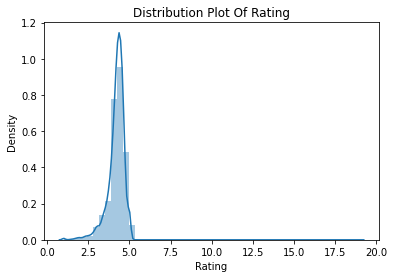

In [11]:
sns.distplot(play_store_data.Rating.dropna())
plt.title('Distribution Plot Of Rating')

In [12]:
play_store_data.Rating.dropna().median()

4.3

In [13]:
#Fill NaN Values in Rating Column with Median

play_store_data['Rating'] = play_store_data['Rating'].fillna(play_store_data['Rating'].median())

In [14]:
# Missing Value Count Function
def show_missing():
    missing = play_store_data.columns[play_store_data.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(play_store_data[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(play_store_data[show_missing()].isnull().sum().sort_values(ascending = False)/len(play_store_data)*100,2))

Missing Data Count
Current Ver       8
Android Ver       3
Type              1
Content Rating    1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Current Ver       0.07
Android Ver       0.03
Type              0.01
Content Rating    0.01
dtype: float64


In [15]:
#Dropping null as they are now negligible 
play_store_data.dropna(inplace=True)

In [16]:
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


##Cleaning Data And Making It In Proper Format

**App**

In [17]:
play_store_data['App'].value_counts().head().reset_index()

,index,App
0,ROBLOX,9
1,"CBS Sports App - Scores, News, Stats & Watch Live",8
2,Candy Crush Saga,7
3,8 Ball Pool,7
4,ESPN,7


In [18]:
#View of one of the duplicate app 
play_store_data[play_store_data['App']=="ROBLOX"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [19]:
#As all rows have same data, only a slight difference in Reviews, we will delete duplicates 
play_store_data.drop_duplicates(subset=['App'],inplace=True)

In [20]:
play_store_data[play_store_data['App']=="ROBLOX"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


**Reviews**

In [21]:
type(play_store_data['Reviews'].iloc[0])

str

In [22]:
#converting Reviews type into integer
play_store_data['Reviews'] = pd.to_numeric(play_store_data['Reviews'])

In [23]:
type(play_store_data['Reviews'].iloc[0])

numpy.int64

**Size**

In [24]:
play_store_data['Size'].value_counts().head()

Varies with device    1226
12M                   181 
11M                   181 
13M                   177 
14M                   176 
Name: Size, dtype: int64

In [25]:
play_store_data['Size'].value_counts().tail()

721k    1
430k    1
429k    1
200k    1
619k    1
Name: Size, dtype: int64

In [26]:
#Impute nulls inplace of Varies with device 
play_store_data['Size'] = play_store_data['Size'].apply(lambda x: x.replace('Varies with device', 'NaN'))

In [27]:
#removing M and k from values, also coverting KB into MB 
play_store_data['Size'] =play_store_data['Size'].apply(lambda x: x.replace('M', '') if 'M' in str(x) else x )
play_store_data['Size'] = play_store_data['Size'].apply(lambda x: float(x.replace('k', ''))/1000 if 'k' in str(x) else x)

In [28]:
play_store_data['Size'] = play_store_data['Size'].astype(float)

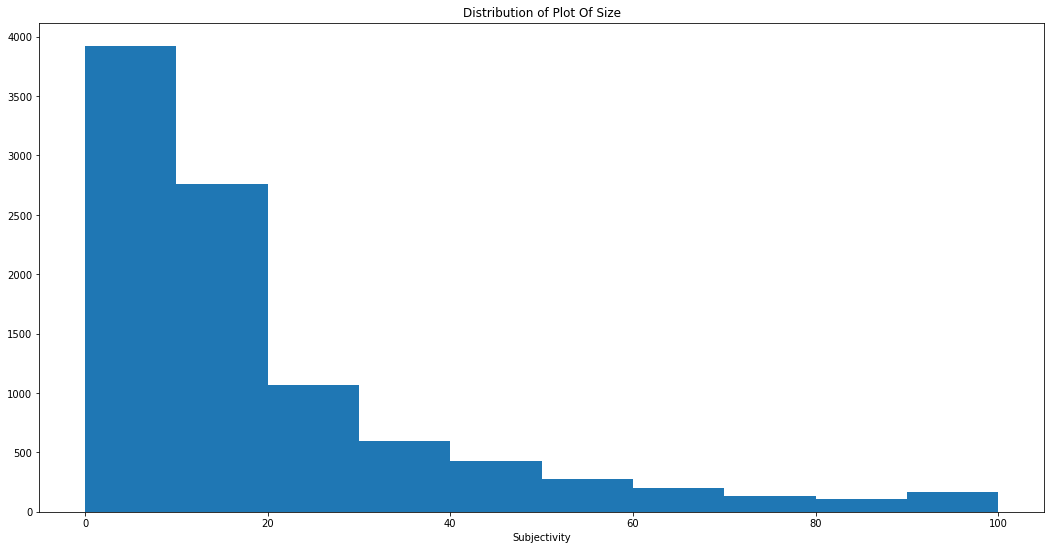

In [131]:
plt.figure(figsize=(18,9))
plt.xlabel("Subjectivity")
plt.title("Distribution of Plot Of Size")
plt.hist(play_store_data.Size.dropna())
plt.show()

In [30]:
play_store_data.Size.dropna().median()

12.0

In [31]:
#Fill NaN Values in Size Column with Median
play_store_data['Size'] = play_store_data['Size'].fillna(play_store_data['Size'].median())

In [32]:
play_store_data['Size'].isnull().sum()

0

**Installs**

In [33]:
play_store_data['Installs'].value_counts()

1,000,000+        1416
100,000+          1112
10,000+           1029
10,000,000+       937 
1,000+            886 
100+              709 
5,000,000+        607 
500,000+          504 
50,000+           468 
5,000+            467 
10+               384 
500+              328 
50+               204 
50,000,000+       202 
100,000,000+      188 
5+                82  
1+                67  
500,000,000+      24  
1,000,000,000+    20  
0+                14  
Name: Installs, dtype: int64

In [34]:
#Removing + and ,
play_store_data['Installs']=play_store_data['Installs'].apply(lambda x:x.replace('+','') if '+' in str(x) else x) 
play_store_data['Installs']=play_store_data['Installs'].apply(lambda x:x.replace(',','') if ',' in str(x) else x) 

In [35]:
type(play_store_data.Installs.iloc[0])

str

In [36]:
#converting Installs type into integer
play_store_data['Installs'] = pd.to_numeric(play_store_data['Installs'])

In [37]:
type(play_store_data.Installs.iloc[0])

numpy.int64

**Price**

In [38]:
play_store_data['Price'].value_counts().head()

0        8895
$0.99    143 
$2.99    124 
$1.99    73  
$4.99    70  
Name: Price, dtype: int64

In [39]:
#removing $ 
play_store_data['Price']=play_store_data['Price'].apply(lambda x:x.replace('$','') if '$' in str(x) else x)

In [40]:
type(play_store_data.Price.iloc[0])

str

In [41]:
#converting into float
play_store_data['Price']=play_store_data['Price'].astype(float)

In [42]:
type(play_store_data.Price.iloc[0])

numpy.float64

In [43]:
play_store_data.isna().any().any()

False

In [44]:
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   int64  
 4   Size            9648 non-null   float64
 5   Installs        9648 non-null   int64  
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   float64
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB


Now play store data is cleaned and ready to use

##Analyzing Each Feature Separately

**Category**

In [45]:
len(play_store_data['Category'].unique())

33

In [46]:
category_count=play_store_data['Category'].value_counts().reset_index().rename(columns={'index':'Category','Category':'Count'})
category_count

,Category,Count
0,FAMILY,1828
1,GAME,959
2,TOOLS,825
3,BUSINESS,420
4,MEDICAL,395
5,PRODUCTIVITY,374
6,PERSONALIZATION,374
7,LIFESTYLE,369
8,FINANCE,345
9,SPORTS,325


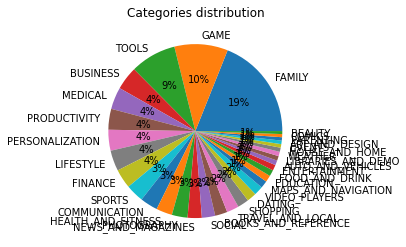

In [47]:
plt.pie(category_count['Count'],labels=category_count['Category'],autopct='%.0f%%')
plt.title('Categories distribution')
plt.show()

**Top 10 categories**

In [48]:
Top10_categories=play_store_data['Category'].value_counts().reset_index().head(10)
Top10_categories.rename(columns={'index':'Category','Category':'Count'},inplace=True)
Top10_categories

,Category,Count
0,FAMILY,1828
1,GAME,959
2,TOOLS,825
3,BUSINESS,420
4,MEDICAL,395
5,PRODUCTIVITY,374
6,PERSONALIZATION,374
7,LIFESTYLE,369
8,FINANCE,345
9,SPORTS,325


Text(0.5, 1.0, 'Top 10 Categories Count')

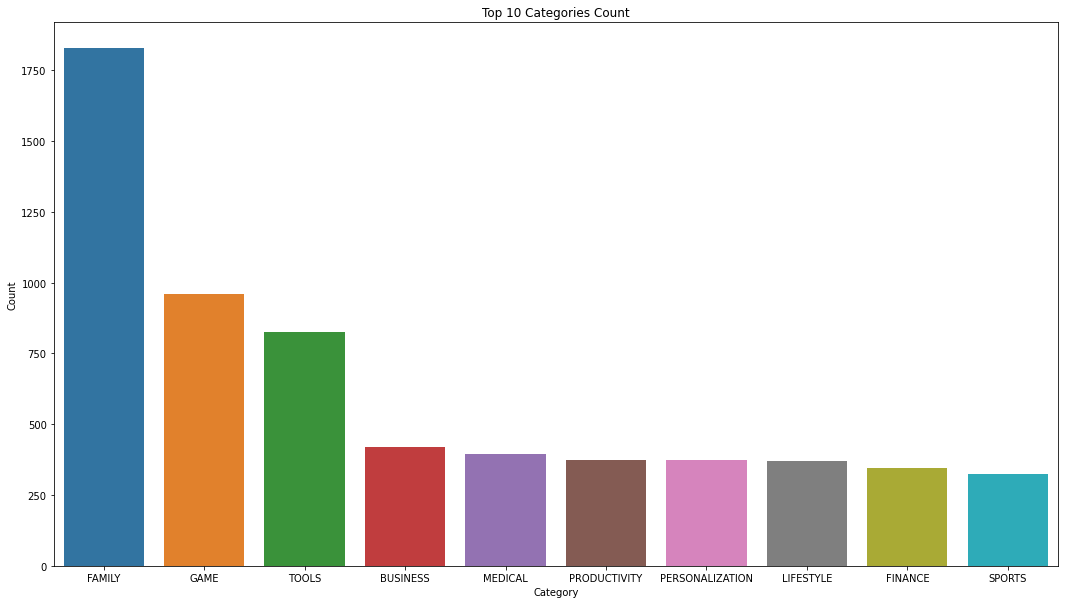

In [49]:
plt.rcParams['figure.figsize'] = (18, 10)
sns.barplot(Top10_categories['Category'],Top10_categories['Count'])
plt.title('Top 10 Categories Count')

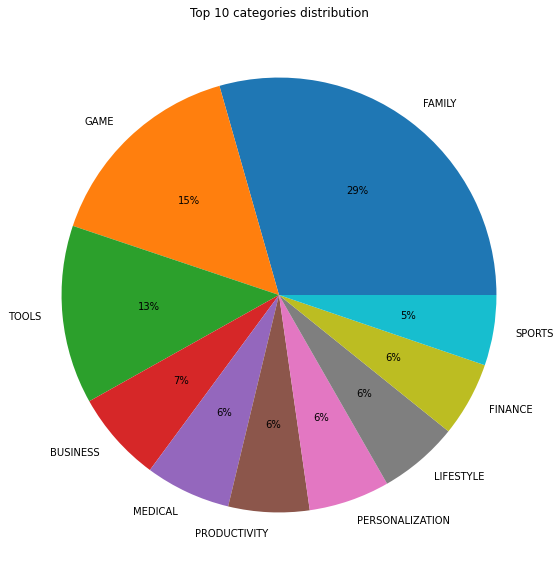

In [50]:
plt.pie(Top10_categories['Count'],labels=Top10_categories['Category'],autopct='%.0f%%')
plt.title('Top 10 categories distribution')
plt.show()

Apps of Family category are the most.

**Rating**

In [51]:
play_store_data['Rating'].describe()

count    9648.000000
mean     4.192465   
std      0.496552   
min      1.000000   
25%      4.000000   
50%      4.300000   
75%      4.500000   
max      5.000000   
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Distribution Plot Of Rating')

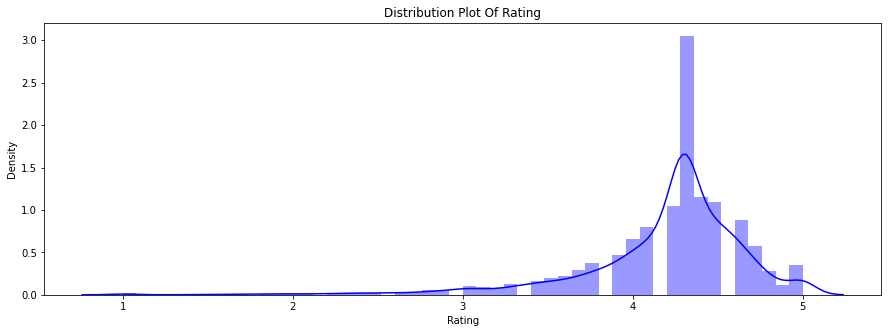

In [52]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(play_store_data['Rating'],color="blue")
plt.title('Distribution Plot Of Rating')

Data is negatively skewed with mean rating of 4.19




**Reviews**

In [53]:
#play_store_data['Reviews'].describe()

In [54]:
#plt.rcParams['figure.figsize'] = (15, 5)
#sns.distplot(play_store_data['Reviews'])

**Size**

In [55]:
play_store_data['Size'].describe()

count    9648.000000
mean     19.344761  
std      20.590271  
min      0.008500   
25%      5.300000   
50%      12.000000  
75%      25.000000  
max      100.000000 
Name: Size, dtype: float64

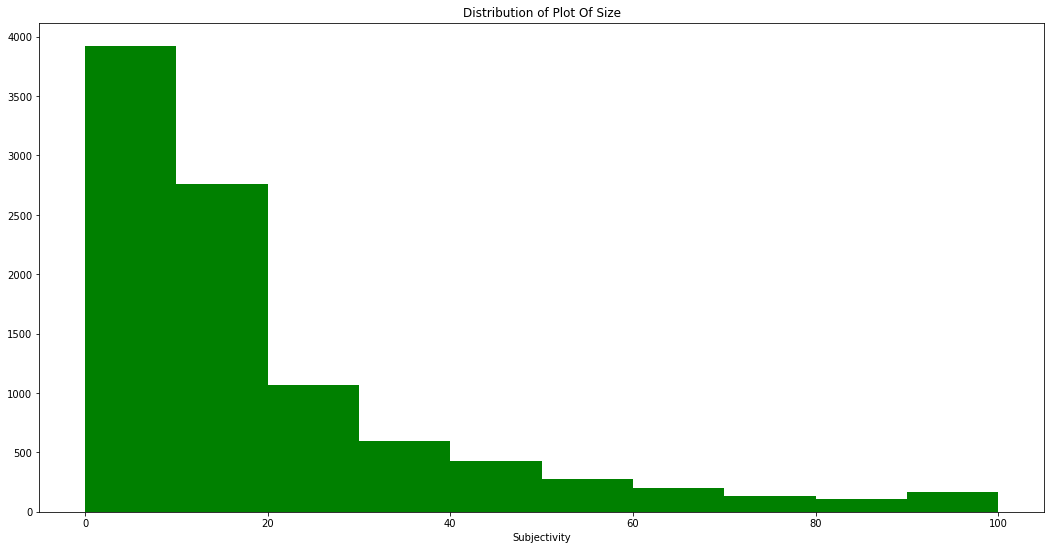

In [132]:
plt.figure(figsize=(18,9))
plt.xlabel("Subjectivity")
plt.title("Distribution of Plot Of Size")
plt.hist(play_store_data.Size.dropna(),color="green")
plt.show()

Data is positively skewed with median size of 12 MB and max size of 100 MB

**Installs**

In [57]:
#play_store_data['Installs'].describe()

In [58]:
#plt.rcParams['figure.figsize'] = (15, 5)
#sns.distplot(play_store_data['Installs'])

**Price**

In [59]:
play_store_data['Price'].describe()

count    9648.000000
mean     1.100193   
std      16.861727  
min      0.000000   
25%      0.000000   
50%      0.000000   
75%      0.000000   
max      400.000000 
Name: Price, dtype: float64

In [60]:
price_count= play_store_data['Price'].value_counts().reset_index()
price_count.rename(columns={'index':'Price','Price':'Count'},inplace=True)
price_count.head()

,Price,Count
0,0.00,8895
1,0.99,143
2,2.99,124
3,1.99,73
4,4.99,70


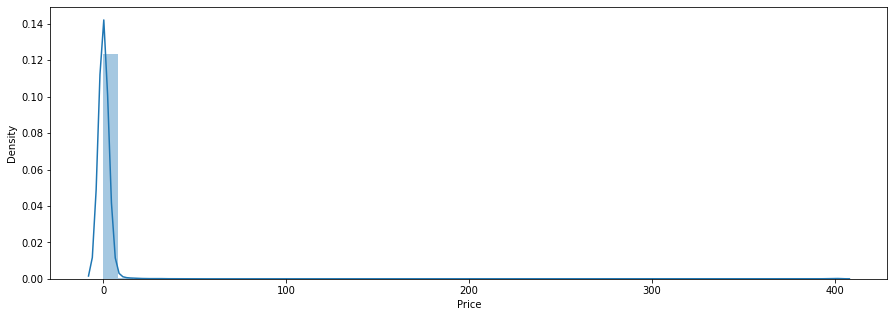

In [61]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(play_store_data['Price'])

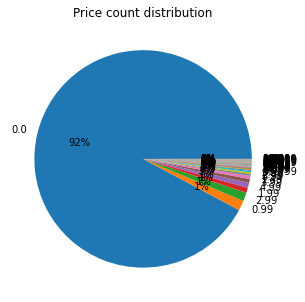

In [62]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.pie(price_count['Count'],labels=price_count['Price'],autopct='%.0f%%')
plt.title('Price count distribution')
plt.show()




*  Data is positively skewed with mean price of 1, max price of 400.
*  Approximately 92% apps are free.



**Genres**

In [63]:
genres_count=play_store_data['Genres'].value_counts().reset_index()
genres_count.rename(columns={'index':'Genres','Genres':'count'},inplace=True)
genres_count.head(10)

,Genres,count
0,Tools,824
1,Entertainment,560
2,Education,509
3,Business,420
4,Medical,395
5,Productivity,374
6,Personalization,374
7,Lifestyle,368
8,Finance,345
9,Sports,331


In [64]:
Top_15_genres=genres_count.head(15)
Top_15_genres

,Genres,count
0,Tools,824
1,Entertainment,560
2,Education,509
3,Business,420
4,Medical,395
5,Productivity,374
6,Personalization,374
7,Lifestyle,368
8,Finance,345
9,Sports,331


Text(0.5, 1.0, 'Bar Plot Of Top 15 Genres')

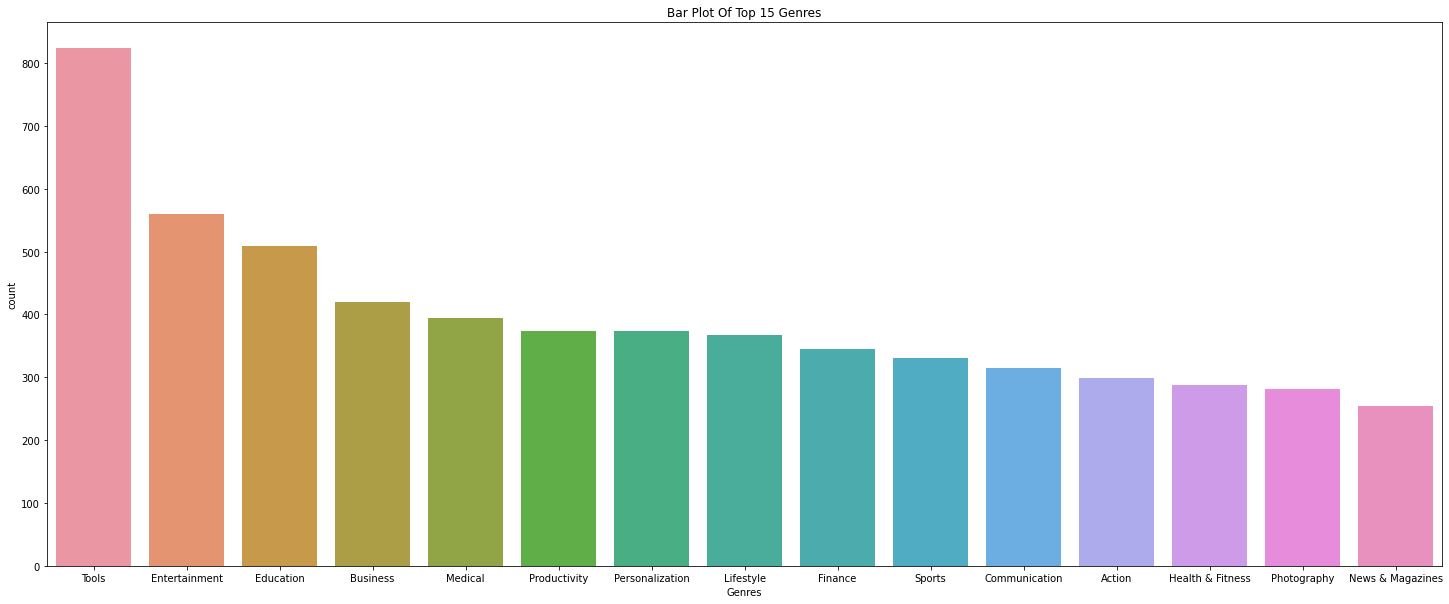

In [65]:
plt.rcParams['figure.figsize'] = (25, 10)
sns.barplot(Top_15_genres['Genres'],Top_15_genres['count'])
plt.title('Bar Plot Of Top 15 Genres')

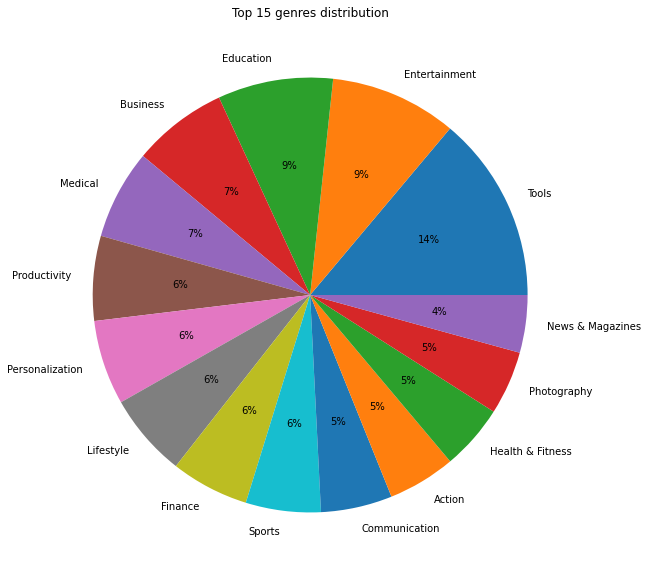

In [66]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.pie(Top_15_genres['count'],labels=Top_15_genres['Genres'],autopct='%.0f%%')
plt.title('Top 15 genres distribution')
plt.show()

Tools is the most used genre in apps.


##Analysis On How Diiferent Features Impacted On Apps
---




In [67]:
play_store_data.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**Top 20 Install Apps**

In [68]:
play_store_data['Installs'].value_counts().tail()

5             82
1             67
500000000     24
1000000000    20
0             14
Name: Installs, dtype: int64

In [69]:
Top20_installs_apps=play_store_data.sort_values(by=['Installs'], ascending =False).head(20)
Top20_installs_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3736,Google News,NEWS_AND_MAGAZINES,3.9,877635,13.0,1000000000,Free,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,12.0,1000000000,Free,0.0,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device
3127,Google Street View,TRAVEL_AND_LOCAL,4.2,2129689,12.0,1000000000,Free,0.0,Everyone,Travel & Local,"August 6, 2018",Varies with device,Varies with device
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,12.0,1000000000,Free,0.0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device
3687,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,12.0,1000000000,Free,0.0,Teen,Video Players & Editors,"August 6, 2018",Varies with device,Varies with device
2554,Google+,SOCIAL,4.2,4831125,12.0,1000000000,Free,0.0,Teen,Social,"July 26, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,12.0,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2544,Facebook,SOCIAL,4.1,78158306,12.0,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
3234,Google,TOOLS,4.4,8033493,12.0,1000000000,Free,0.0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,12.0,1000000000,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device


**Categories of Top 20 Install App's**

In [70]:
category_of_Top20_installs_apps=Top20_installs_apps['Category'].value_counts().reset_index().rename(columns={'index':'Category','Category':'Count'})
category_of_Top20_installs_apps

,Category,Count
0,COMMUNICATION,6
1,SOCIAL,3
2,TRAVEL_AND_LOCAL,2
3,VIDEO_PLAYERS,2
4,NEWS_AND_MAGAZINES,1
5,TOOLS,1
6,BOOKS_AND_REFERENCE,1
7,PRODUCTIVITY,1
8,PHOTOGRAPHY,1
9,GAME,1


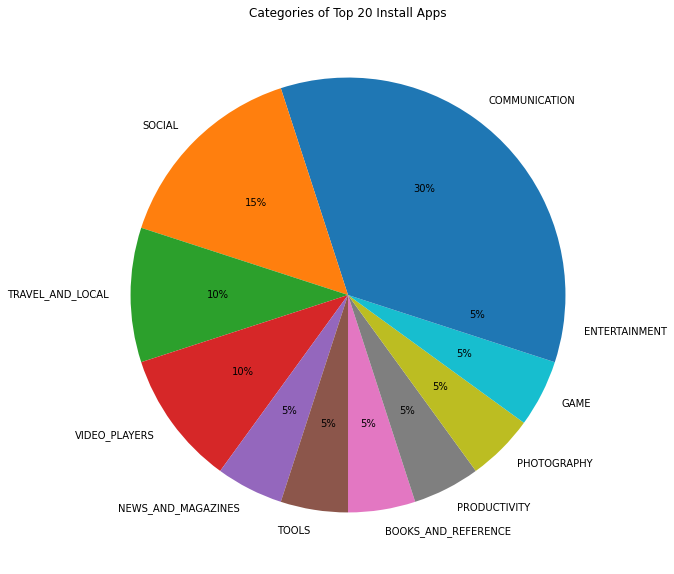

In [71]:
plt.pie(category_of_Top20_installs_apps['Count'],labels=category_of_Top20_installs_apps['Category'],autopct='%.0f%%')
plt.title('Categories of Top 20 Install Apps')
plt.show()

**Category And Rating**

In [72]:
Category_by_mean_rating=play_store_data.groupby('Category')['Rating'].mean().reset_index(name="Mean Rating").sort_values(by=['Mean Rating'], ascending =False)
Category_by_mean_rating.head(5)

,Category,Mean Rating
10,EVENTS,4.395313
0,ART_AND_DESIGN,4.373016
8,EDUCATION,4.363866
3,BOOKS_AND_REFERENCE,4.334389
23,PERSONALIZATION,4.324866


**Category And Installs**

In [73]:
Top5_Category_by_no_of_install=play_store_data.groupby('Category')['Installs'].sum().reset_index(name="Total Installs").sort_values(by=['Total Installs'], ascending =False).head(5)
Top5_Category_by_no_of_install

,Category,Total Installs
14,GAME,13878924415
6,COMMUNICATION,11038276251
29,TOOLS,8001271905
25,PRODUCTIVITY,5793091369
27,SOCIAL,5487867902


**Genres And Installs**

In [74]:
Top5_genres_by_no_of_install=play_store_data.groupby('Genres')['Installs'].sum().reset_index(name="Total Installs").sort_values(by=['Total Installs'], ascending =False).head(5)
Top5_genres_by_no_of_install

,Genres,Total Installs
35,Communication,11038276251
107,Tools,7991271905
81,Productivity,5793091369
100,Social,5487867902
80,Photography,4649147655


**Mean Rating of Top 5 Categories By No. Of Installs**

In [75]:
mean_rating_of_top5_categories_by_no_of_installs=pd.merge(Top5_Category_by_no_of_install, Category_by_mean_rating , on='Category')
mean_rating_of_top5_categories_by_no_of_installs

,Category,Total Installs,Mean Rating
0,GAME,13878924415,4.249948
1,COMMUNICATION,11038276251,4.154921
2,TOOLS,8001271905,4.073455
3,PRODUCTIVITY,5793091369,4.206150
4,SOCIAL,5487867902,4.255230


**Category And** **Price**

In [76]:
Category_by_mean_price=play_store_data.groupby('Category')['Price'].mean().reset_index(name="Mean Price").sort_values(by=['Mean Price'], ascending =False)
Category_by_mean_price.head(5)

,Category,Mean Price
12,FINANCE,8.408203
18,LIFESTYLE,6.398022
20,MEDICAL,2.520759
10,EVENTS,1.718594
11,FAMILY,1.312292


**Mean Price of Top 5 Categories By No. Of Installs**

In [77]:
mean_price_of_top5_categories_by_no_of_installs=pd.merge(mean_rating_of_top5_categories_by_no_of_installs,Category_by_mean_price, on='Category')
mean_price_of_top5_categories_by_no_of_installs

,Category,Total Installs,Mean Rating,Mean Price
0,GAME,13878924415,4.249948,0.296465
1,COMMUNICATION,11038276251,4.154921,0.263937
2,TOOLS,8001271905,4.073455,0.322739
3,PRODUCTIVITY,5793091369,4.206150,0.670936
4,SOCIAL,5487867902,4.255230,0.066820


**App's With 5 Star Rating**

In [78]:
five_star_rating_apps=play_store_data[play_store_data['Rating']==5]
five_star_rating_apps['App'].nunique()

271

**Top 10 Categories Of 5 Star Rating App's**

In [79]:
five_star_rating_apps['Category'].value_counts().reset_index().rename(columns={'index':'Category','Category':'Count'}).head(10)

,Category,Count
0,FAMILY,67
1,LIFESTYLE,29
2,MEDICAL,25
3,BUSINESS,18
4,TOOLS,17
5,GAME,12
6,HEALTH_AND_FITNESS,12
7,PERSONALIZATION,10
8,SOCIAL,8
9,PRODUCTIVITY,8


**Top 50 App's by Price**

In [80]:
Top50_apps_by_price= play_store_data.sort_values(by=['Price'],ascending=False).head(50)
Top50_apps_by_price

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.300,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5373,I AM RICH PRO PLUS,FINANCE,4.0,36,41.000,1000,Paid,399.99,Everyone,Finance,"June 25, 2018",1.0.2,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,0.965,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up
5351,I am rich,LIFESTYLE,3.8,3547,1.800,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5369,I am Rich,FINANCE,4.3,180,3.800,5000,Paid,399.99,Everyone,Finance,"March 22, 2018",1.0,4.2 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26.000,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
5364,I am rich (Most expensive app),FINANCE,4.1,129,2.700,1000,Paid,399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,4.3,0,40.000,0,Paid,399.99,Everyone,Lifestyle,"December 1, 2017",MONEY,4.1 and up
5362,I Am Rich Pro,FAMILY,4.4,201,2.700,5000,Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up
5358,I am Rich!,FINANCE,3.8,93,22.000,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up


**Category Distribution Of Top 50 App's By Price**

In [81]:
Top50_apps_by_price['Category'].value_counts().reset_index().rename(columns={'index':'Category','Category':'Count'})

,Category,Count
0,MEDICAL,12
1,FINANCE,10
2,FAMILY,10
3,LIFESTYLE,7
4,BUSINESS,3
5,PHOTOGRAPHY,2
6,PRODUCTIVITY,1
7,EVENTS,1
8,SPORTS,1
9,TOOLS,1


**No. Of Apps Of Free And Paid Categories**

In [82]:
no_of_apps_of_free_and_paid_categories= play_store_data.groupby(['Category','Type'])['App'].count().reset_index().rename(columns={'App':'Count','index':'App'})
no_of_apps_of_free_and_paid_categories

,Category,Type,Count
0,ART_AND_DESIGN,Free,60
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,82
3,AUTO_AND_VEHICLES,Paid,3
4,BEAUTY,Free,53
5,BOOKS_AND_REFERENCE,Free,193
6,BOOKS_AND_REFERENCE,Paid,28
7,BUSINESS,Free,408
8,BUSINESS,Paid,12
9,COMICS,Free,56


In [128]:
no_of_apps_of_free_and_paid_categories[no_of_apps_of_free_and_paid_categories['Type']=='Paid'].sort_values(by=['Count'],ascending=False)

,Category,Type,Count
21,FAMILY,Paid,182
38,MEDICAL,Paid,83
27,GAME,Paid,82
44,PERSONALIZATION,Paid,80
56,TOOLS,Paid,77
6,BOOKS_AND_REFERENCE,Paid,28
48,PRODUCTIVITY,Paid,28
11,COMMUNICATION,Paid,27
54,SPORTS,Paid,24
34,LIFESTYLE,Paid,19


**No. Of Install's Of Free And Paid Categories**

In [83]:
no_of_installs_of_free_and_paid_categories= play_store_data.groupby(['Category','Type'])['Installs'].sum().reset_index().rename(columns={'App':'Count','index':'App'})
no_of_installs_of_free_and_paid_categories

,Category,Type,Installs
0,ART_AND_DESIGN,Free,114317100
1,ART_AND_DESIGN,Paid,16000
2,AUTO_AND_VEHICLES,Free,53080061
3,AUTO_AND_VEHICLES,Paid,50150
4,BEAUTY,Free,27197050
5,BOOKS_AND_REFERENCE,Free,1665945260
6,BOOKS_AND_REFERENCE,Paid,23316
7,BUSINESS,Free,696952090
8,BUSINESS,Paid,212775
9,COMICS,Free,44981150


In [84]:
play_store_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**Correlation Heatmap**

In [144]:
#Correlation
play_store_data.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.050215,0.037383,0.034310,-0.018673
Reviews,0.050215,1.000000,0.066147,0.625158,-0.007604
Size,0.037383,0.066147,1.000000,0.030467,-0.019590
Installs,0.034310,0.625158,0.030467,1.000000,-0.009413
Price,-0.018673,-0.007604,-0.019590,-0.009413,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

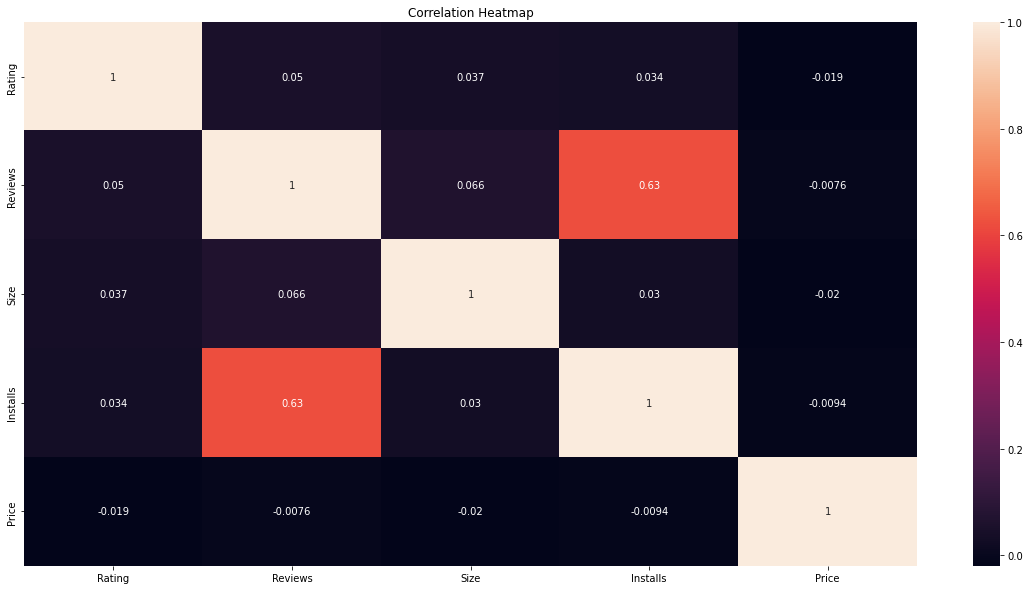

In [143]:
plt.figure(figsize = (20,10))
sns.heatmap(play_store_data.corr(), annot= True)
plt.title("Correlation Heatmap")

Text(0.5, 1.0, 'Regression Plot of Installs And Reviews')

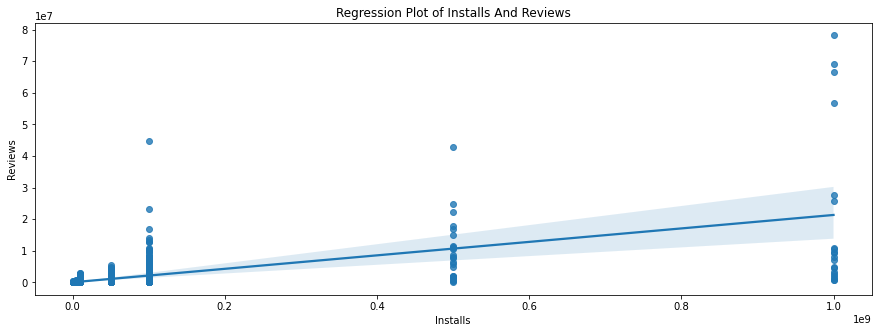

In [142]:
sns.regplot(x="Installs",y="Reviews",data=play_store_data)
plt.title("Regression Plot of Installs And Reviews")

**There is some significant amount of positive correlation between Installs and Reviews. This is expected as no. of Installs increases more interactions will happen which leads to increasing no. of Reviews.**

#Let's Drive Into The User Reviews Data

In [90]:
user_reviews_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,"I like eat delicious food. That's I'm cooking food myself, case ""10 Best Foods"" helps lot, also ""Best Before (Shelf Life)""",Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [91]:
user_reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


##Handling missing values

In [92]:
user_reviews_data[user_reviews_data['Translated_Review'].isnull()].head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN


In [93]:
user_reviews_data.dropna(subset=['Translated_Review'],inplace=True)

In [94]:
user_reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


#Combining Both Dataset

In [95]:
#unique apps is user_reviews_data
user_reviews_data['App'].nunique()

865

In [96]:
#unique apps is play_store_data
play_store_data['App'].nunique()

9648

In [97]:
#Merging both data
combined_data=pd.merge(play_store_data,user_reviews_data, on='App')

In [98]:
combined_data['App'].nunique()

816

In [99]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35929 entries, 0 to 35928
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     35929 non-null  object 
 1   Category                35929 non-null  object 
 2   Rating                  35929 non-null  float64
 3   Reviews                 35929 non-null  int64  
 4   Size                    35929 non-null  float64
 5   Installs                35929 non-null  int64  
 6   Type                    35929 non-null  object 
 7   Price                   35929 non-null  float64
 8   Content Rating          35929 non-null  object 
 9   Genres                  35929 non-null  object 
 10  Last Updated            35929 non-null  object 
 11  Current Ver             35929 non-null  object 
 12  Android Ver             35929 non-null  object 
 13  Translated_Review       35929 non-null  object 
 14  Sentiment               35929 non-null

In [100]:
combined_data.isnull().any().sum()

0

##Analysis Of Combined Data

**Translated Reviews**

**Most Frequent Words In Translated Reviews**

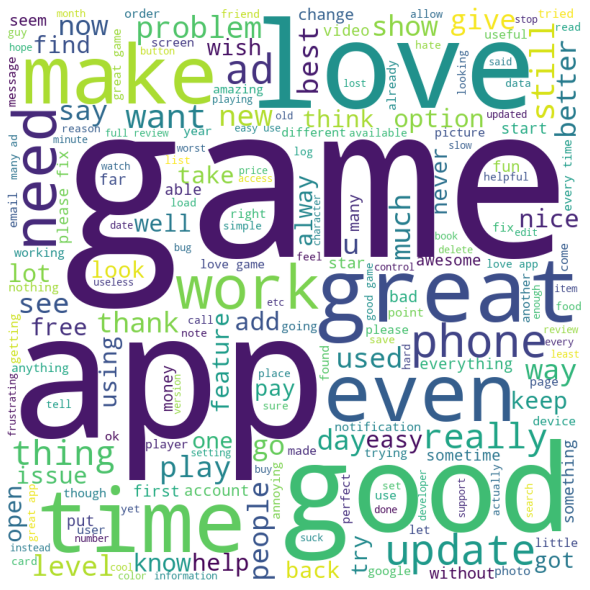

In [101]:
#Importing worcloud
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)
for val in combined_data.Translated_Review:   
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

**Sentiment**

In [102]:
sentiment_count= combined_data.Sentiment.value_counts().reset_index().rename(columns={'index':'Sentiment','Sentiment':'count'})
sentiment_count

,Sentiment,count
0,Positive,23073
1,Negative,8005
2,Neutral,4851


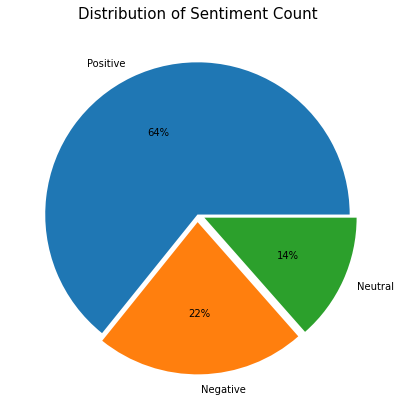

In [103]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.pie(sentiment_count['count'],labels=sentiment_count['Sentiment'],autopct='%.0f%%',explode=(0,0.05,0.05))
plt.title('Distribution of Sentiment Count',size=15)
plt.show()

In [104]:
Appwise_sentiment_count=combined_data.groupby(['App','Sentiment'])['Sentiment'].count().reset_index(name='count')
Appwise_sentiment_count.head()

,App,Sentiment,count
0,10 Best Foods for You,Negative,10
1,10 Best Foods for You,Neutral,22
2,10 Best Foods for You,Positive,162
3,11st,Negative,7
4,11st,Neutral,9


In [105]:
Top_apps_with_max_sentiment=Appwise_sentiment_count.sort_values(by="count",ascending=False)
Top20_apps_with_most_positive_sentiment=Top_apps_with_max_sentiment[Top_apps_with_max_sentiment['Sentiment']=='Positive'].head(20)
Top20_apps_with_most_positive_sentiment

,App,Sentiment,count
2115,Helix Jump,Positive,209
1279,Duolingo: Learn Languages Free,Positive,200
824,Calorie Counter - Macros,Positive,174
664,Bowmasters,Positive,169
827,Calorie Counter - MyFitnessPal,Positive,169
2,10 Best Foods for You,Positive,162
1951,Google Photos,Positive,143
54,8fit Workouts & Meal Planner,Positive,137
1845,Garena Free Fire,Positive,136
1103,DRAGON BALL LEGENDS,Positive,127


**Categories of Top20 Apps With Most Positive Sentiment**

In [106]:
d1=pd.merge(Top20_apps_with_most_positive_sentiment,combined_data, on='App')
categories_of_Top20_apps_with_most_positive_sentiment=d1[['App','Sentiment_x','count','Category']]
d2=categories_of_Top20_apps_with_most_positive_sentiment.groupby(['App','Sentiment_x','Category'])['count'].mean().reset_index(name='count')
d2['Category'].value_counts().reset_index().rename(columns={'index':'Category','Category':'Count'})

,Category,Count
0,GAME,8
1,HEALTH_AND_FITNESS,6
2,PRODUCTIVITY,2
3,SPORTS,1
4,ENTERTAINMENT,1
5,EDUCATION,1
6,PHOTOGRAPHY,1


**Categoriwise Sentiment Count**

In [107]:
categoriwise_sentiment_count=combined_data.groupby(['Category','Sentiment'])['Sentiment'].count().reset_index(name='count')
categoriwise_sentiment_count

,Category,Sentiment,count
0,ART_AND_DESIGN,Negative,61
1,ART_AND_DESIGN,Neutral,62
2,ART_AND_DESIGN,Positive,259
3,AUTO_AND_VEHICLES,Negative,17
4,AUTO_AND_VEHICLES,Neutral,36
5,AUTO_AND_VEHICLES,Positive,236
6,BEAUTY,Negative,65
7,BEAUTY,Neutral,88
8,BEAUTY,Positive,185
9,BOOKS_AND_REFERENCE,Negative,95


In [108]:
categoriwise_sentiment_count.sort_values(by=['count'],ascending=False)

,Category,Sentiment,count
44,GAME,Positive,3936
42,GAME,Negative,2408
47,HEALTH_AND_FITNESS,Positive,1754
35,FAMILY,Positive,1249
23,DATING,Positive,1068
92,TRAVEL_AND_LOCAL,Positive,1034
77,PRODUCTIVITY,Positive,990
62,MEDICAL,Positive,967
86,SPORTS,Positive,938
38,FINANCE,Positive,911


**Sentiment Polarity**

In [109]:
combined_data['Sentiment_Polarity'].describe()

count    35929.000000
mean     0.180904    
std      0.350080    
min     -1.000000    
25%      0.000000    
50%      0.150000    
75%      0.400000    
max      1.000000    
Name: Sentiment_Polarity, dtype: float64

In [110]:
combined_data['Sentiment_Polarity'].skew()

-0.10633599216001281

In [111]:
appwise_mean_sentiment_polarity=combined_data.groupby(['App'])['Sentiment_Polarity'].mean().reset_index()
appwise_mean_sentiment_polarity.head()

,App,Sentiment_Polarity
0,10 Best Foods for You,0.470733
1,11st,0.185943
2,1800 Contacts - Lens Store,0.318145
3,1LINE – One Line with One Touch,0.196290
4,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,0.449566


In [112]:
Top20_apps_with_maximum_mean_sentiment_polarity=appwise_mean_sentiment_polarity.sort_values(by="Sentiment_Polarity",ascending=False).head(20)
Top20_apps_with_maximum_mean_sentiment_polarity

,App,Sentiment_Polarity
797,HomeWork,1.000000
708,Google Slides,0.933333
404,Daily Workouts - Exercise Fitness Routine Trainer,0.800000
201,Bed Time Fan - White Noise Sleep Sounds,0.781250
304,Cameringo Lite. Filters Camera,0.770269
707,Google Primer,0.750000
652,GPS Map Free,0.700000
653,GPS Speedometer and Odometer,0.687500
204,Best Ovulation Tracker Fertility Calendar App Glow,0.595313
12,3D Live Neon Weed Launcher,0.568182


Text(0.5, 1.0, 'Box Plot Of Sentiment_Polarity')

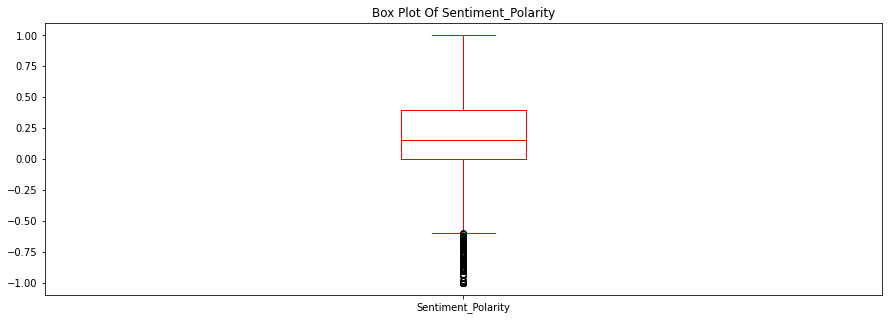

In [145]:
plt.rcParams['figure.figsize'] = (15, 5)
combined_data['Sentiment_Polarity'].plot(kind="box",color="red")
plt.title('Box Plot Of Sentiment_Polarity')

Text(0.5, 1.0, 'Distribution Plot Of Sentiment_Polarity')

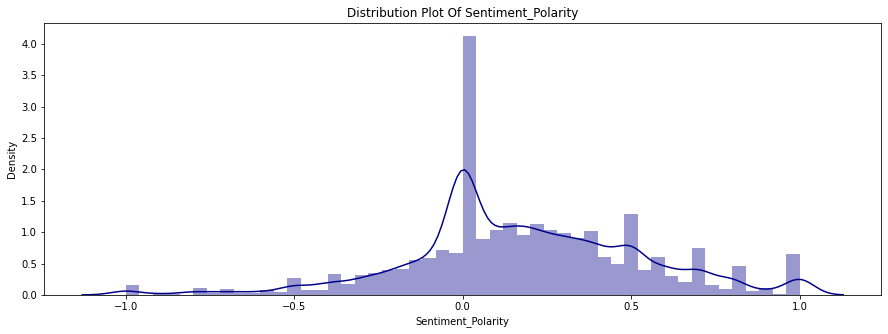

In [113]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(combined_data['Sentiment_Polarity'],color="darkblue")
plt.title('Distribution Plot Of Sentiment_Polarity')

**Categories of Top20 Apps With Maximum Mean Sentiment Polarity**

In [114]:
d3=pd.merge(Top20_apps_with_maximum_mean_sentiment_polarity,combined_data, on='App')
categories_of_Top20_apps_with_maximum_mean_sentiment_polarity=d3[['App','Sentiment_Polarity_x','Category']]
d4=categories_of_Top20_apps_with_maximum_mean_sentiment_polarity.groupby(['App','Category'])['Sentiment_Polarity_x'].mean().reset_index(name='count')
d4['Category'].value_counts().reset_index().rename(columns={'index':'Category','Category':'Count'})

,Category,Count
0,HEALTH_AND_FITNESS,3
1,SPORTS,2
2,TOOLS,2
3,EDUCATION,2
4,TRAVEL_AND_LOCAL,2
5,PERSONALIZATION,1
6,LIFESTYLE,1
7,PHOTOGRAPHY,1
8,FOOD_AND_DRINK,1
9,MAPS_AND_NAVIGATION,1


**Sentiment Subjectivity**

In [115]:
combined_data['Sentiment_Subjectivity'].describe()

count    35929.000000
mean     0.493767    
std      0.258053    
min      0.000000    
25%      0.361111    
50%      0.514835    
75%      0.650000    
max      1.000000    
Name: Sentiment_Subjectivity, dtype: float64

In [116]:
combined_data['Sentiment_Subjectivity'].skew()

-0.31108162534793066

In [117]:
appwise_mean_sentiment_Subjectivity=combined_data.groupby(['App'])['Sentiment_Subjectivity'].mean().reset_index()
appwise_mean_sentiment_Subjectivity.head()

,App,Sentiment_Subjectivity
0,10 Best Foods for You,0.495455
1,11st,0.455340
2,1800 Contacts - Lens Store,0.591098
3,1LINE – One Line with One Touch,0.557315
4,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,0.520573


In [118]:
Top3_apps_with_maximum_mean_sentiment_Subjectivity=appwise_mean_sentiment_Subjectivity.sort_values(by="Sentiment_Subjectivity",ascending=False).head(3)
Top3_apps_with_maximum_mean_sentiment_Subjectivity

,App,Sentiment_Subjectivity
708,Google Slides,0.916667
404,Daily Workouts - Exercise Fitness Routine Trainer,0.750000
331,Choice Hotels,0.719206


Text(0.5, 1.0, 'Distribution Plot Of Sentiment_Subjectivity')

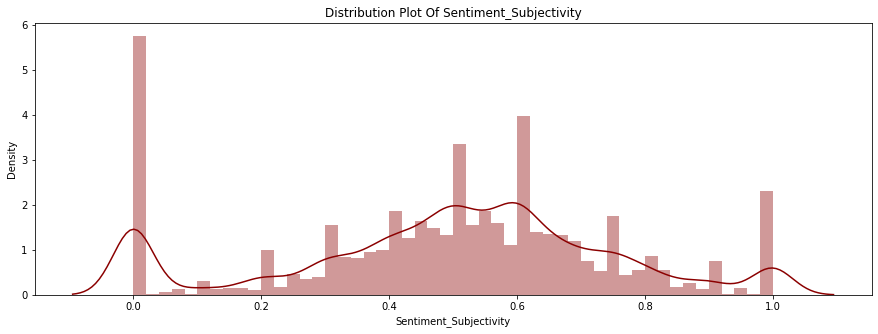

In [138]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(combined_data['Sentiment_Subjectivity'],color="darkred")
plt.title('Distribution Plot Of Sentiment_Subjectivity')

All About Top50 Installs App's of which sentimental data is available

In [120]:
Top50_installs_capps_0=combined_data.groupby(['App'])['Installs'].mean().reset_index(name='Install').sort_values(by=['Install'], ascending =False).head(50)
#Top50_installs_capps=Top50_installs_capps_0[['App','Category','Rating','Reviews','Installs','Price','Genres', 'Sentiment', 'Sentiment_Polarity','Sentiment_Subjectivity']]
#Top50_installs_capps

In [121]:
d5=pd.merge(Top50_installs_capps_0,combined_data, on='App')
all_about_top50_install_apps1=d5[['App','Install','Category','Rating','Price','Genres', 'Sentiment', 'Sentiment_Polarity','Sentiment_Subjectivity']]
all_about_top50_install_apps1.head(3)

,App,Install,Category,Rating,Price,Genres,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Hangouts,1.000000e+09,COMMUNICATION,4.0,0.0,Communication,Positive,0.263889,0.458333
1,Hangouts,1.000000e+09,COMMUNICATION,4.0,0.0,Communication,Positive,0.150000,0.600000
2,Hangouts,1.000000e+09,COMMUNICATION,4.0,0.0,Communication,Neutral,0.000000,0.000000


**Category Distribution of Top 50 Install App's**

In [122]:
df=all_about_top50_install_apps1.groupby(['App','Category'])['Category'].count().reset_index(name='count')
df['Category'].value_counts().reset_index().rename(columns={'index':'Category','Category':'Count'})

,Category,Count
0,GAME,15
1,TOOLS,6
2,COMMUNICATION,6
3,PRODUCTIVITY,4
4,SOCIAL,4
5,SHOPPING,3
6,PHOTOGRAPHY,3
7,BOOKS_AND_REFERENCE,2
8,TRAVEL_AND_LOCAL,2
9,NEWS_AND_MAGAZINES,2


#Conclusion



*   Most of the app's belongs to Family category. They are approximately 19% in the data.

*   Ratings are negatively skewed with mean rating of 4.19

*   Sizes are positively skewed with median size of 12 MB.

*  Prices are positively skewed with mean price of 1,median price of 0 and max price of 400.

*  Approximately 92% apps are free.

*  Tools, Entertainment and Education are the top 3 genres.

*  Approximately 64% sentiments are positive, 22% are negative and 14% are neutral.

*  Mean Sentiment Polarity is 0.180904

*  Mean Sentiment Subjectivity is 0.493767



*   Among Top 20 install apps 30% belongs to the communication category and 15% belongs to the social category.

*   Events category have the maximum mean rating of 4.395313

*   Genres of Communication, Tools, Productivity and Social have the maximum no. of installs.

*   Apps belonging to Finance category have the highest mean price (8.408203)  among all categories.

*   There are 271 apps which have 5 star rating. In which 67 apps belongs to the Family category. 

*   Family category has the highest no. of paid apps.

*   Installs are positively correlated with reviews with correlation value of 0.63

